In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from folium import plugins
%config InlineBackend.figure_format = 'retina' #Use this %config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5 #You can dynamically change the default rc (runtime configuration) settings in a python
#script or interactively from the python shell.
pd.options.mode.chained_assignment = None  #The warning went away and my code runs faster.
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as matplotlib

In [ ]:
df=pd.read_csv("binary_info.csv")

FileNotFoundError: ignored

In [ ]:
df.drop("illegal_fishing",axis=1,inplace = True)

In [ ]:
df.head(10)

,mmsi,gear_type,length,tonnage,engine_power,country,IUU Fishing
0,603100157,trawlers,32.808468,299.003814,733.826977,Angola,2.37
1,603100137,trawlers,34.568782,395.683171,864.960188,Angola,2.37
2,603100161,trawlers,28.822140,263.849149,651.809642,Angola,2.37
3,603100174,trawlers,30.721429,299.700916,703.796086,Angola,2.37
4,603100164,trawlers,37.479248,405.967747,850.976640,Angola,2.37
5,603100139,trawlers,27.433138,277.298135,748.685601,Angola,2.37
6,603100175,trawlers,32.359115,442.479813,888.783860,Angola,2.37
7,603100159,trawlers,37.760114,443.995706,886.866416,Angola,2.37
8,603100160,trawlers,32.420990,395.693995,812.267999,Angola,2.37
9,603703900,purse_seines,36.787125,292.406624,1182.221917,Angola,2.37


In [ ]:
df.isnull().sum()

mmsi            0
gear_type       0
length          0
tonnage         0
engine_power    0
country         0
IUU Fishing     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66198 entries, 0 to 66197
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mmsi             66198 non-null  int64  
 1   gear_type        66198 non-null  object 
 2   length           66198 non-null  float64
 3   tonnage          66198 non-null  float64
 4   engine_power     66198 non-null  float64
 5   IUU Fishing      66198 non-null  float64
 6   illegal_fishing  66198 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 3.5+ MB


In [ ]:
df['mmsi'].value_counts().sort_values(ascending=True)

603100157    1
701000511    1
701096000    1
701000632    1
701006038    1
            ..
601099800    1
601764000    1
601089100    1
601538000    1
601826000    1
Name: mmsi, Length: 66198, dtype: int64

In [ ]:
df["gear_type"].unique()

array(['trawlers', 'purse_seines', 'fixed_gear', 'squid_jigger',
       'other_fishing', 'drifting_longlines'], dtype=object)

In [ ]:
df.describe()

,mmsi,length,tonnage,engine_power,IUU Fishing,illegal_fishing
count,6.619800e+04,66198.000000,66198.000000,66198.000000,66198.000000,66198.000000
mean,4.099500e+08,25.570647,164.723933,436.829401,3.398349,0.024910
std,1.734474e+08,11.493177,414.749714,558.803305,0.778243,0.155852
min,9.100000e+01,5.974774,1.000000,14.000000,1.430000,0.000000
25%,2.738294e+08,18.603873,44.953373,225.438069,2.500000,0.000000
50%,4.124113e+08,23.500000,81.688920,316.498895,3.930000,0.000000
75%,4.124702e+08,29.974307,143.767258,444.013388,3.930000,0.000000
max,1.012475e+09,144.600000,14055.000000,14601.395619,3.930000,1.000000


In [ ]:
df['mmsi'] = df['mmsi'].astype(str)

In [ ]:
df["mmsi"].str[:1].value_counts()

4    38380
2    15314
9     3191
3     3083
8     2959
1     1063
5      838
7      714
6      656
Name: mmsi, dtype: int64

<div class="alert alert-block alert-info"">
0 Ship group, coast station, or group of coast stations<br>
1 For use by SAR aircraft (111MIDaxx)<br>
2-7 MMSI's used by individual ships, beginning with an MID:<br>
2 Europe (e.g., Italy has MID 247; Denmark has MIDs 219 and 220)<br>
3 North and Central America and Caribbean (e.g., Canada, 316; Greenland, 331; Panama, 351 through 357, plus 370 through 373; United States, 303(Alaska), 338(domestic), plus 366 through 369)<br>
4 Asia (not the southeast) (e.g., PRC, 412, 413, and 414; Maldives, 455; Japan, 431)<br>
5 Oceania (Australia, 503; New Zealand, 512), and Southeast Asia (Philippines, 548; Indonesia, 525)<br>
6 Africa (Eritrea, 625)<br>
7 South America (Peru, 760)<br>
8 Handheld VHF transceiver with DSC and GNSS<br>
9 Devices using a free-form number identity<br>
                                          </div>

In [ ]:
df.dtypes

mmsi              int64
gear_type        object
length          float64
tonnage         float64
engine_power    float64
country          object
IUU Fishing     float64
dtype: object

In [ ]:
import plotly.express as px
corr = df.corr()
fig = px.imshow(df.corr(), color_continuous_scale=['blue','yellow'])
annotations = []
for i in range(len(corr)):
    for j in range(len(corr)):
        annotations.append(dict(x=j, y=i, text='{:.2f}'.format(corr.iloc[i, j]), showarrow=False))
fig.update_layout(
    title='Correlation Matrix of Overfishing Dataset',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Features'),
    annotations=annotations,
    font=dict(size=14)
)

# Show the heatmap
fig.show()


<ipython-input-16-189510e00e3d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
<ipython-input-16-189510e00e3d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig = px.imshow(df.corr(), color_continuous_scale=['blue','yellow'])


In [ ]:
df.isnull().sum()

mmsi               0
gear_type          0
length             0
tonnage            0
engine_power       0
IUU Fishing        0
illegal_fishing    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=["gear_type"]

df[label] = df[label].apply(LabelEncoder().fit_transform)

df[label].head()

,gear_type
0,5
1,5
2,5
3,5
4,5


In [ ]:
df

,mmsi,gear_type,length,tonnage,engine_power,country,IUU Fishing
0,603100157,5,32.808468,299.003814,733.826977,Angola,2.37
1,603100137,5,34.568782,395.683171,864.960188,Angola,2.37
2,603100161,5,28.822140,263.849149,651.809642,Angola,2.37
3,603100174,5,30.721429,299.700916,703.796086,Angola,2.37
4,603100164,5,37.479248,405.967747,850.976640,Angola,2.37
...,...,...,...,...,...,...,...
66193,601764000,0,17.032258,52.550920,207.818629,South Africa,2.43
66194,601089100,0,22.915622,180.506028,527.507463,South Africa,2.43
66195,601849000,0,19.692080,86.485661,362.553279,South Africa,2.43
66196,601183700,0,31.872860,307.446773,977.330342,South Africa,2.43


In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as matplotlib

In [ ]:
from folium import plugins
%config InlineBackend.figure_format = 'retina' #Use this %config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5 #You can dynamically change the default rc (runtime configuration) settings in a python
#script or interactively from the python shell.
pd.options.mode.chained_assignment = None  #The warning went away and my code runs faster.
pd.set_option('display.max_columns',None)

### Train test split

In [ ]:
X = df.drop("illegal_fishing",axis=1)
y = df["illegal_fishing"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Oversampling to balance the train dataset

### SMOTE over sampling

In [ ]:
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
sc = StandardScaler()
X_train_resampled = sc.fit_transform(X_train_resampled)
X_test = sc.transform(X_test)

In [ ]:
X_train

,mmsi,gear_type,length,tonnage,engine_power,IUU Fishing
57371,244860535,5,28.392815,272.977531,775.473977,2.02
11102,800034691,5,19.648764,54.307621,257.361383,3.93
35883,900013459,1,21.000148,117.348388,183.374263,3.93
47960,224597000,0,26.002782,201.877505,365.955588,2.56
27559,190701129,5,25.258909,153.705114,339.704186,3.93
...,...,...,...,...,...,...
41993,412420972,4,50.100000,611.000000,993.000000,3.93
21243,900020246,5,41.774776,96.164753,328.528416,3.93
45891,219013976,1,15.480000,46.900000,112.000000,1.94
42613,900900332,2,30.903153,169.861195,300.186181,3.93


In [ ]:
X_train_resampled

array([[-1.10546148,  1.03138386, -0.54090888, -0.3158493 , -0.17549626,
        -1.69164825],
       [ 2.8959294 ,  1.03138386, -0.95759385, -0.52833494, -0.66041766,
         0.96139695],
       [ 3.61652153, -0.90463061, -0.89319562, -0.46707705, -0.72966503,
         0.96139695],
       ...,
       [-0.8993446 ,  0.06337663,  0.60579587,  0.42739462,  0.52785643,
        -0.1081553 ],
       [-0.22273544, -0.90463061, -0.79059043, -0.40483229, -0.52346892,
        -1.31661045],
       [-0.90010941,  1.03138386,  1.65246477,  1.93319653,  2.17388284,
        -0.1081553 ]])

In [ ]:
df

,mmsi,gear_type,length,tonnage,engine_power,IUU Fishing,illegal_fishing
0,603100157,5,32.808468,299.003814,733.826977,2.37,0
1,603100137,5,34.568782,395.683171,864.960188,2.37,0
2,603100161,5,28.822140,263.849149,651.809642,2.37,0
3,603100174,5,30.721429,299.700916,703.796086,2.37,0
4,603100164,5,37.479248,405.967747,850.976640,2.37,0
...,...,...,...,...,...,...,...
66193,601764000,0,17.032258,52.550920,207.818629,2.43,0
66194,601089100,0,22.915622,180.506028,527.507463,2.43,0
66195,601849000,0,19.692080,86.485661,362.553279,2.43,0
66196,601183700,0,31.872860,307.446773,977.330342,2.43,0


In [ ]:
df.drop("illegal_fishing",axis=1,inplace = True)

In [ ]:
df

,mmsi,gear_type,length,tonnage,engine_power,IUU Fishing
0,603100157,5,32.808468,299.003814,733.826977,2.37
1,603100137,5,34.568782,395.683171,864.960188,2.37
2,603100161,5,28.822140,263.849149,651.809642,2.37
3,603100174,5,30.721429,299.700916,703.796086,2.37
4,603100164,5,37.479248,405.967747,850.976640,2.37
...,...,...,...,...,...,...
66193,601764000,0,17.032258,52.550920,207.818629,2.43
66194,601089100,0,22.915622,180.506028,527.507463,2.43
66195,601849000,0,19.692080,86.485661,362.553279,2.43
66196,601183700,0,31.872860,307.446773,977.330342,2.43


In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

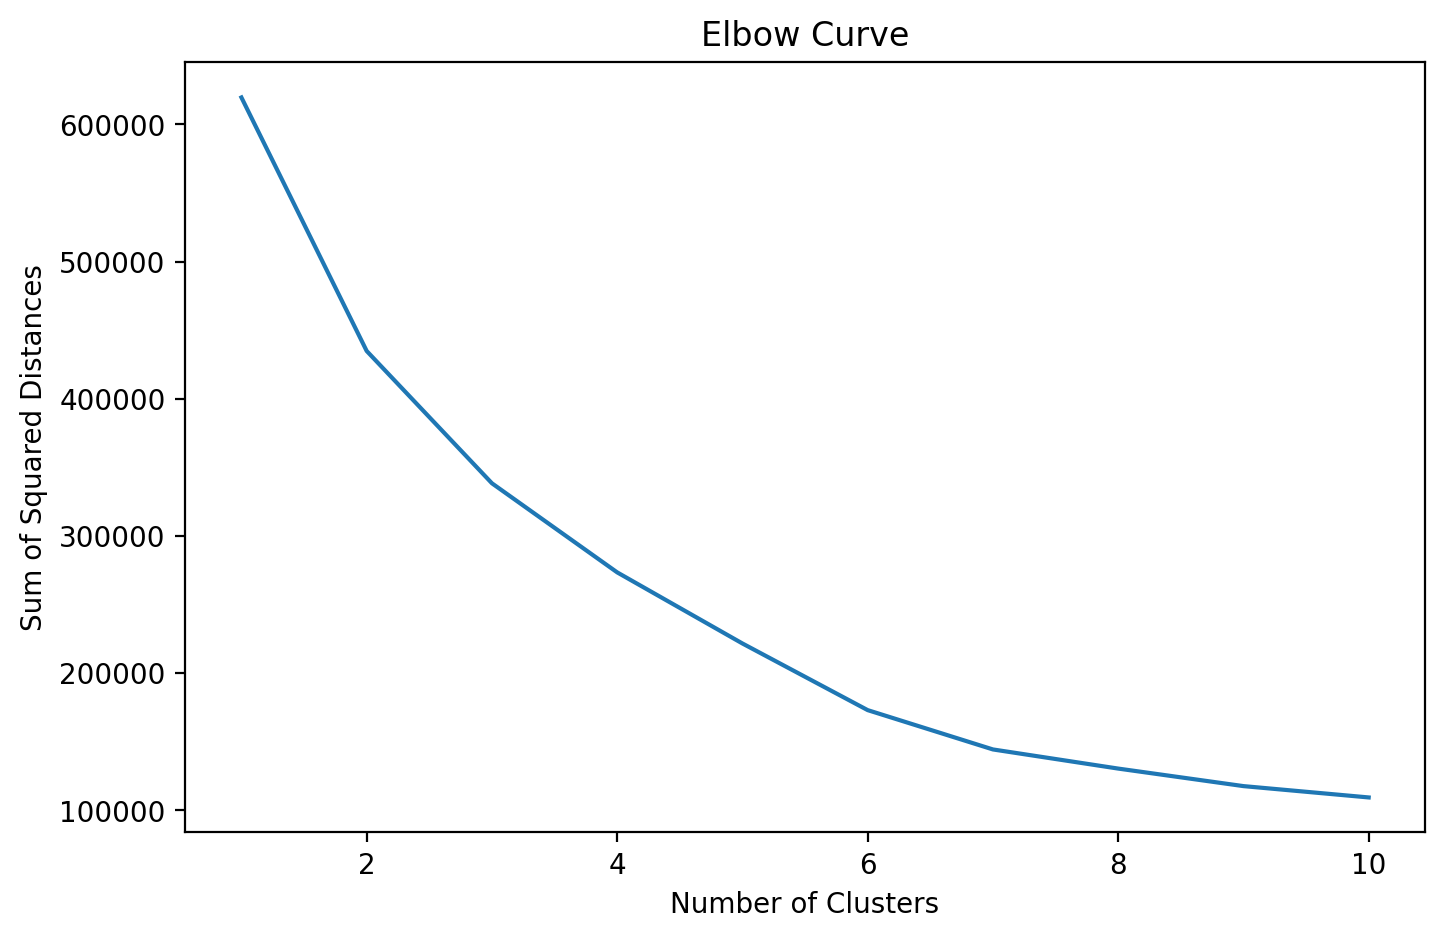

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Generate random data


# Initialize an empty list to store the sum of squared distances
ssd = []

# Try KMeans for different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train_resampled)
    ssd.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), ssd)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()


In [ ]:

kmeans = KMeans(n_clusters=2)

# Fit the algorithm to the data
kmeans.fit(X_train_resampled)

# Predict the clusters for the data points
labels = kmeans.predict(X_train_resampled)

# Get the cluster centers
centers = kmeans.cluster_centers_

# Visualize the clusters


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



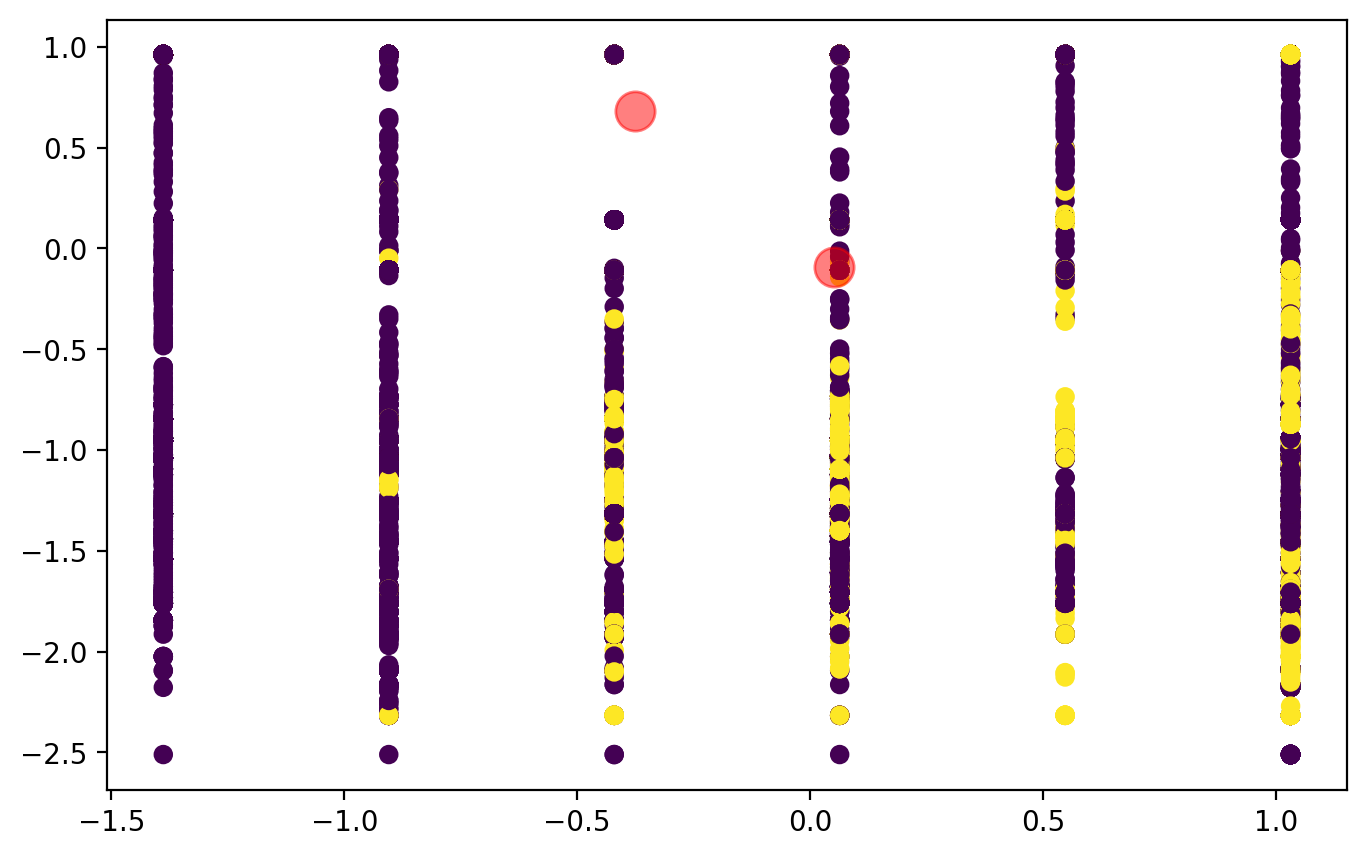

In [ ]:
plt.scatter(X_train_resampled[:, 1], X_train_resampled[:, 5], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



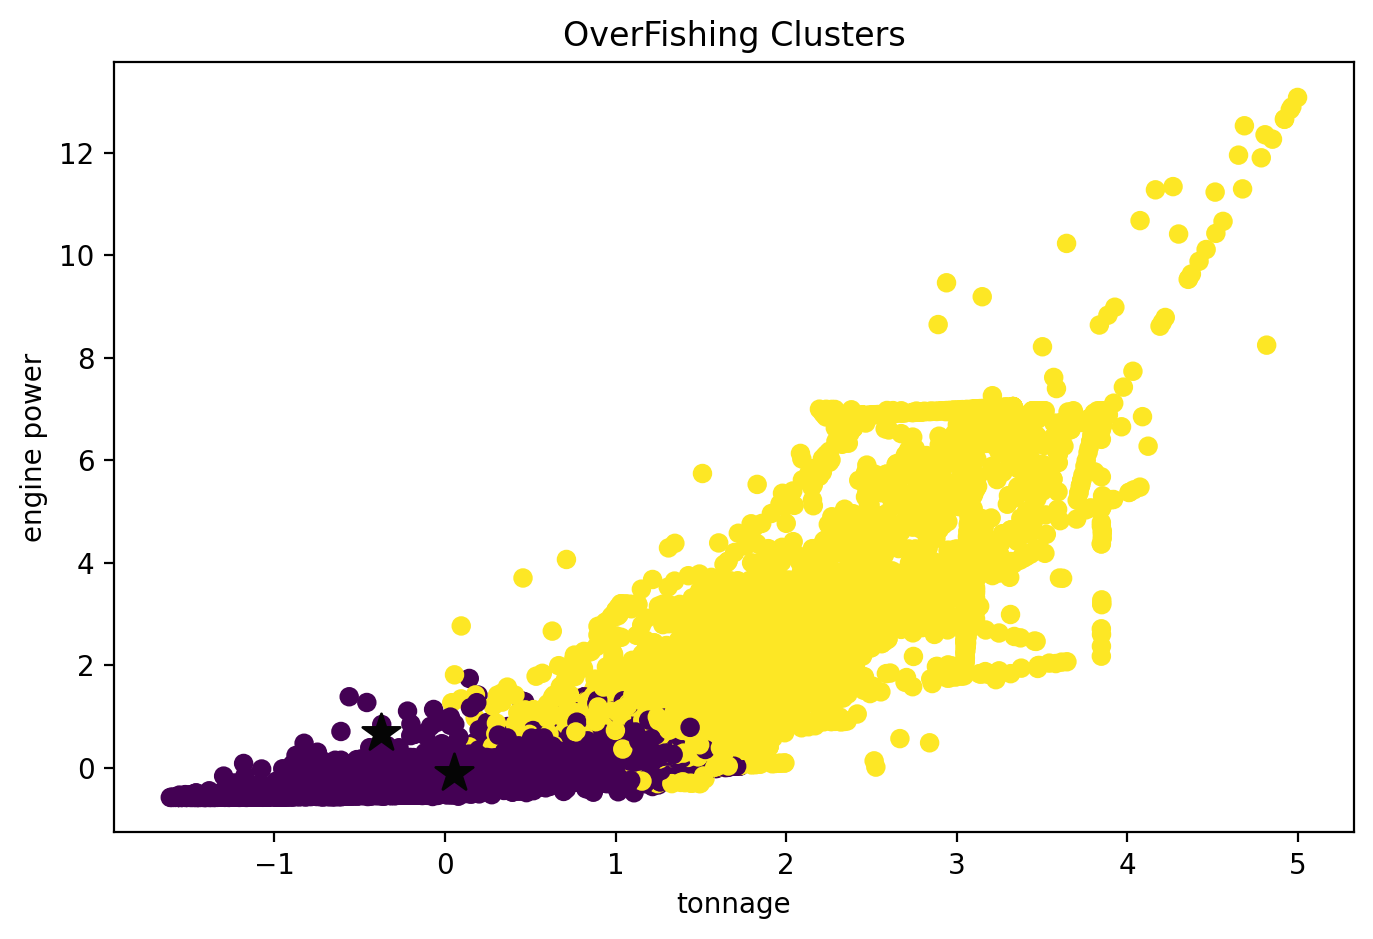

In [ ]:

k = 2

# Create a KMeans object and fit the data
kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train_resampled)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clusters
#plt.figure(figsize=(10, 8))
plt.scatter(X_train_resampled[:, 2], X_train_resampled[:, 3], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
plt.xlabel('tonnage')
plt.ylabel('engine power')
plt.title('OverFishing Clusters')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Generate sample data

# Create a KMeans object and fit the data to it
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train_resampled)

# Get the cluster labels
labels = kmeans.labels_

# Calculate the Silhouette score
silhouette_avg = silhouette_score(X_train_resampled, labels)

# Print the Silhouette score
print("The Silhouette score is:", silhouette_avg)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



The Silhouette score is: 0.43172515217133334


In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(X_train_resampled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



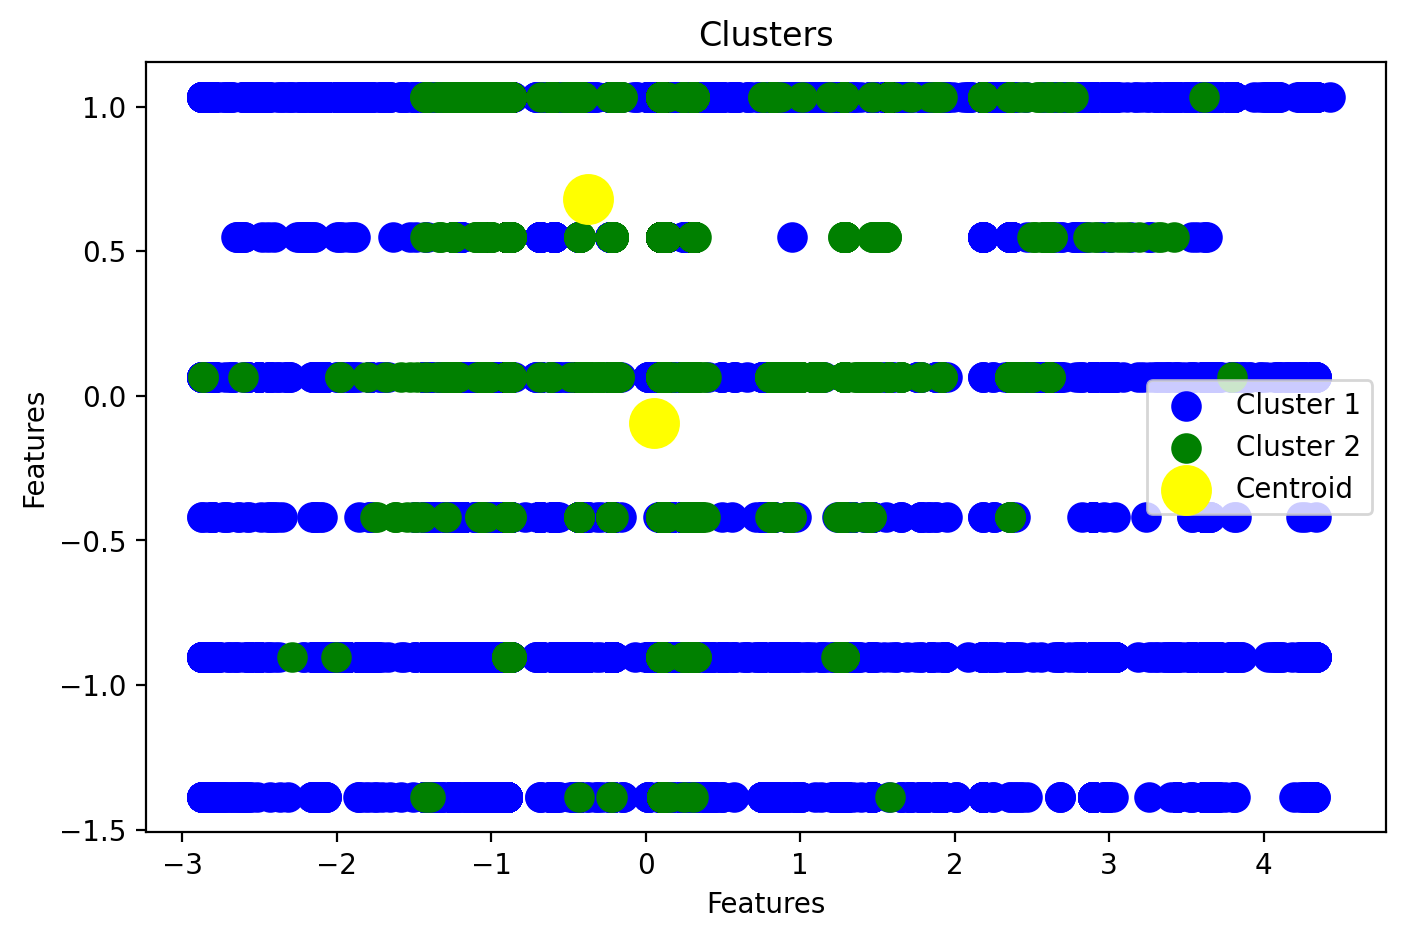

In [ ]:
import matplotlib.pyplot as mtp
#visulaizing the clusters
mtp.scatter(X_train_resampled[y_predict == 0, 0], X_train_resampled[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster
mtp.scatter(X_train_resampled[y_predict == 1, 0], X_train_resampled[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster

mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
mtp.title('Clusters')
mtp.xlabel('Features')
mtp.ylabel('Features')
mtp.legend()
mtp.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Generate sample data

# Create a KMeans object and fit the data to it
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train_resampled)

# Get the cluster labels
labels = kmeans.labels_

# Calculate the Silhouette score
silhouette_avg = silhouette_score(X_train_resampled, labels)

# Print the Silhouette score
print("The Silhouette score is:", silhouette_avg)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



The Silhouette score is: 0.43172515217133334


In [ ]:
len(labels)

103282

In [ ]:
X_train_resampled

array([[-1.10546148,  1.03138386, -0.54090888, -0.3158493 , -0.17549626,
        -1.69164825],
       [ 2.8959294 ,  1.03138386, -0.95759385, -0.52833494, -0.66041766,
         0.96139695],
       [ 3.61652153, -0.90463061, -0.89319562, -0.46707705, -0.72966503,
         0.96139695],
       ...,
       [-0.8993446 ,  0.06337663,  0.60579587,  0.42739462,  0.52785643,
        -0.1081553 ],
       [-0.22273544, -0.90463061, -0.79059043, -0.40483229, -0.52346892,
        -1.31661045],
       [-0.90010941,  1.03138386,  1.65246477,  1.93319653,  2.17388284,
        -0.1081553 ]])

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np

# Load the iris dataset
iris = load_iris()
X = iris.data

# Set the number of clusters to 3
k = 3

# Create a KMeans object and fit the data
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Print the cluster labels and centroids
print("Cluster labels: ", labels)
print("Centroids: ")
print(centroids)


Cluster labels:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Centroids: 
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



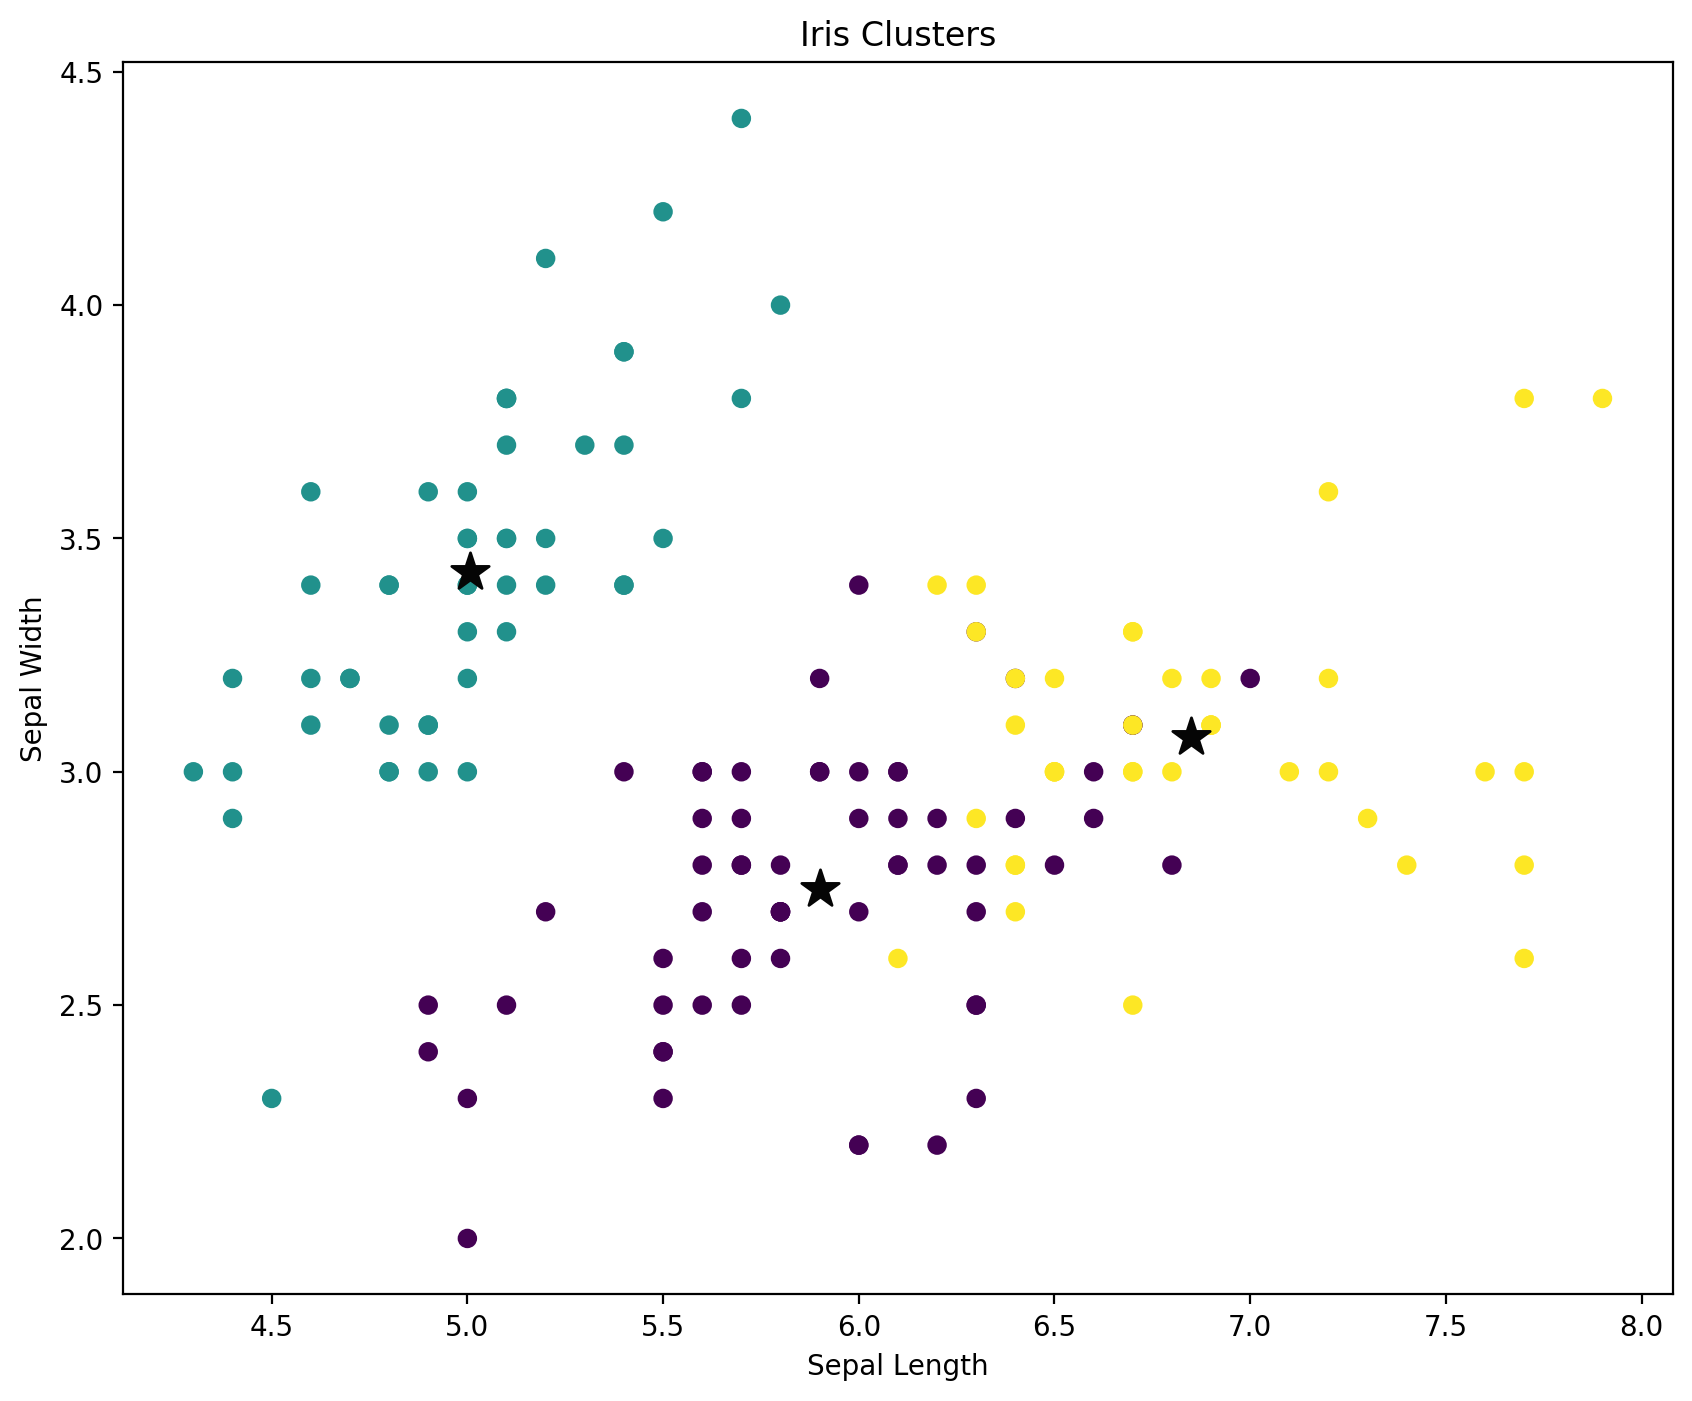

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data

# Set the number of clusters to 3
k = 3

# Create a KMeans object and fit the data
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Clusters')
plt.show()


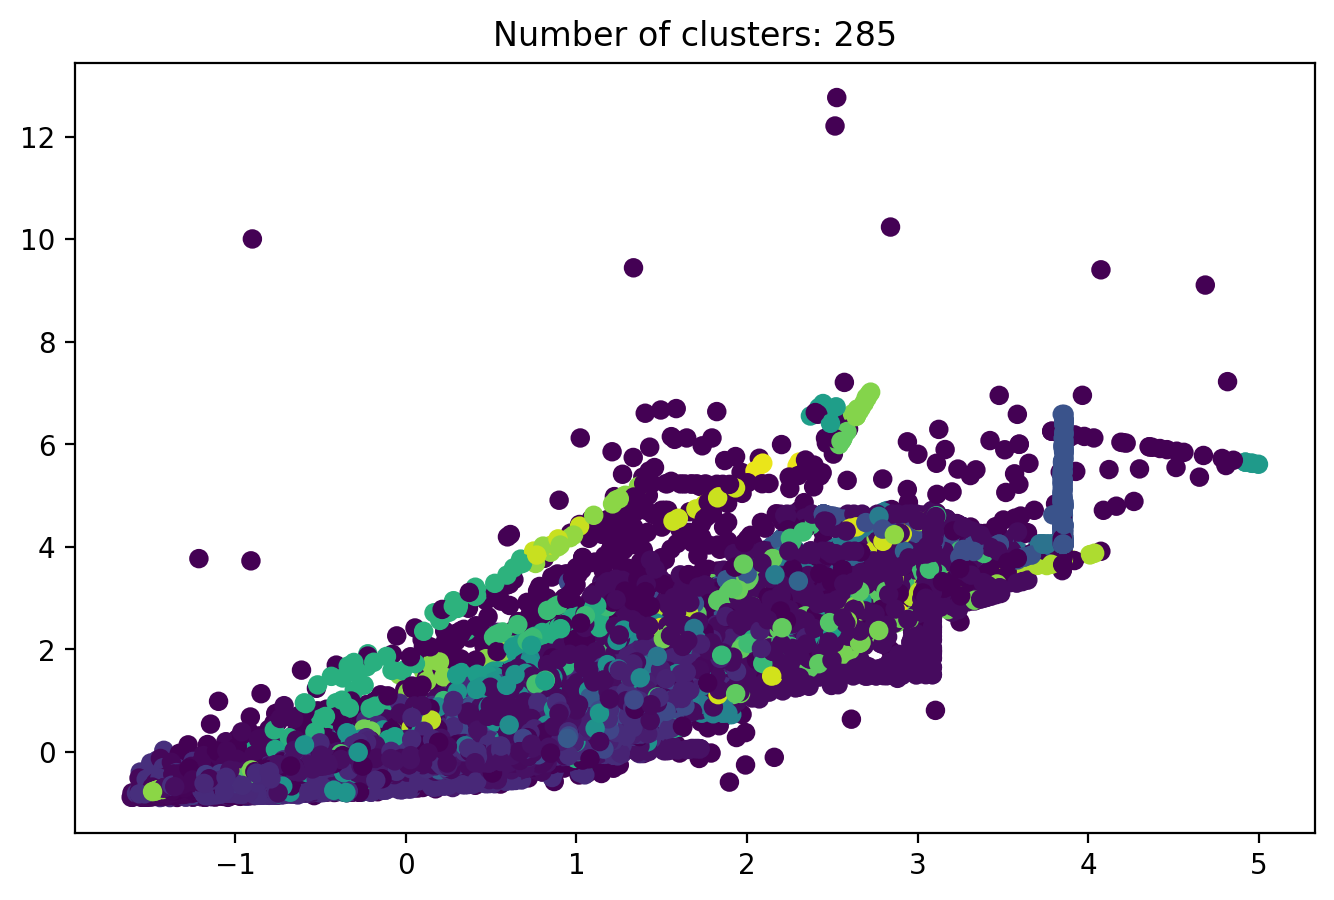

Silhouette score: -0.07612172017974732


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load the dataset


# Scale the dataset


# Create a DBSCAN object
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Fit the DBSCAN object to the dataset
dbscan.fit(X_train_resampled)

# Get the labels and number of clusters
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Plot the clusters
plt.scatter(X_train_resampled[:, 2], X_train_resampled[:, 4], c=labels)
plt.title("Number of clusters: {}".format(n_clusters))
plt.show()


# Calculate the silhouette score
silhouette = silhouette_score(X_train_resampled, labels)

print("Silhouette score:", silhouette)

In [ ]:
y_train_resampled

0         0
1         0
2         0
3         0
4         0
         ..
103277    1
103278    1
103279    1
103280    1
103281    1
Name: illegal_fishing, Length: 103282, dtype: int64

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
kmeans = KMeans(n_clusters=2, random_state=0)
y_pred = kmeans.fit_predict(X_train_resampled)

# Evaluate clustering performance using adjusted Rand score
ari = adjusted_rand_score(y_train_resampled, y_pred)
print("Adjusted Rand score:", ari)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Adjusted Rand score: 0.045848642808722265
